In [ ]:
#transfer learning

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf


In [ ]:
url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
data=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',
                            extract=True,origin=url)
path=os.path.join(os.path.dirname(data),'cats_and_dogs_filtered')
print(path)
train_dir=os.path.join(path,'train')
val_dir=os.path.join(path,'validation')

print(train_dir)
print(val_dir)


/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
BATCH_SIZE=32
IMG_SIZE=(160,160)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['cats', 'dogs']


(32, 160, 160, 3)
(32,)
tf.Tensor([1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1], shape=(32,), dtype=int32)


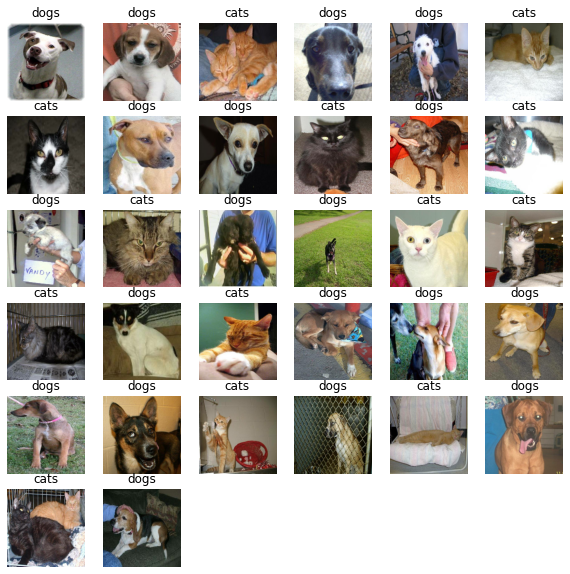

In [ ]:
# a single batch
# visulize
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    for i in range(BATCH_SIZE):
        plt.subplot(6,6,i+1)
        plt.imshow(image_batch[i]/255.0) # float [0-1],int[0-255]
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [ ]:
# project-1
#transfer learning as it is


(224, 224, 3)
(1, 224, 224, 3)


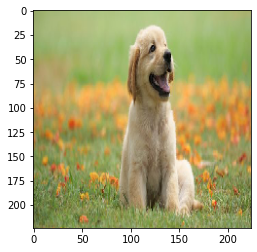

In [ ]:
import tensorflow as tf
dir='/content/drive/MyDrive/CLOUD_DS/puppy.jpg'
image=tf.keras.preprocessing.image.load_img(dir,target_size=(224,224))
img=tf.keras.preprocessing.image.img_to_array(image)
print(img.shape)
plt.imshow(img/255)
img1=tf.expand_dims(img,axis=0)
print(img1.shape)
#from tensorflow.keras.preprocessingimage import load_img,img_to_array


In [ ]:
model=tf.keras.applications.mobilenet.MobileNet()
model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
y=model.predict(img1)

In [ ]:
label=tf.keras.applications.mobilenet.decode_predictions(y)
print(label)

49152/35363 [=========================================] - 0s 0us/step
[[('n04209239', 'shower_curtain', 0.24341184), ('n03530642', 'honeycomb', 0.14406224), ('n03196217', 'digital_clock', 0.09043411), ('n09256479', 'coral_reef', 0.057841577), ('n02782093', 'balloon', 0.045049254)]]


(299, 299, 3)
(1, 299, 299, 3)


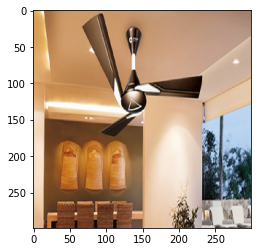

In [ ]:
import tensorflow as tf
dir='/content/drive/MyDrive/CLOUD_DS/fan.jpg'
image=tf.keras.preprocessing.image.load_img(dir,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(image)
print(img.shape)
plt.imshow(img/255)
img1=tf.expand_dims(img,axis=0)
print(img1.shape)

In [ ]:
y=model.predict(img1)
label=tf.keras.applications.mobilenet.decode_predictions(y)
print(label)

[[('n03950228', 'pitcher', 1.0), ('n01924916', 'flatworm', 2.671684e-13), ('n03047690', 'clog', 1.3946009e-13), ('n04131690', 'saltshaker', 4.4353385e-17), ('n04522168', 'vase', 9.167405e-19)]]


In [ ]:
model=tf.keras.applications.inception_v3.InceptionV3()
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
img2=tf.keras.applications.inception_v3.preprocess_input(img1)
y=model.predict(img2)
label=tf.keras.applications.inception_v3.decode_predictions(y)
print(label)

[[('n04081281', 'restaurant', 0.32828355), ('n04200800', 'shoe_shop', 0.26593032), ('n03271574', 'electric_fan', 0.06775283), ('n03529860', 'home_theater', 0.041128118), ('n04548280', 'wall_clock', 0.028048078)]]


In [ ]:
y

array([[9.30029710e-05, 1.15513161e-04, 1.34225076e-04, 1.22075406e-04,
        3.87586129e-04, 3.53936230e-05, 3.14058234e-05, 1.68075465e-04,
        1.01110243e-04, 5.69853801e-05, 1.22984988e-04, 3.14945464e-05,
        3.49889160e-05, 9.54853531e-05, 9.61079568e-05, 7.24169004e-05,
        1.84878780e-04, 2.65185488e-04, 2.87841714e-04, 8.07694014e-05,
        4.14981332e-05, 1.15312832e-04, 5.10734753e-05, 1.35190770e-04,
        1.07414926e-04, 6.16834368e-05, 5.31191508e-05, 9.78269381e-05,
        7.43369092e-05, 5.87364557e-05, 2.92091117e-05, 6.68985303e-05,
        3.69967420e-05, 8.48605268e-05, 7.66324956e-05, 2.99965541e-05,
        2.06244731e-05, 1.72909640e-04, 7.22485856e-05, 5.79247353e-05,
        9.53514100e-05, 5.31355654e-05, 9.51352267e-05, 1.30964050e-04,
        4.74004009e-05, 1.93771266e-04, 8.36885010e-05, 1.55992733e-04,
        1.07777043e-04, 8.00153794e-05, 1.44356542e-04, 3.65448708e-04,
        4.04857128e-05, 2.32366219e-05, 1.00316793e-04, 1.774003

In [ ]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(160,160,3),
                                include_top=False,weights='imagenet')
base_model.trainable=False # freeze the model for training #if true than no transfer learning,,,fine turing do changes or training in last few
print('Number of layers=',len(base_model.layers))
print('Number of weights[W/B]=',len(base_model.weights))
print('Number of trainable variables=',len(base_model.trainable_variables))
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Number of layers= 154
Number of weights[W/B]= 260
Number of trainable variables= 0
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                

In [ ]:
# custom model
inputs=tf.keras.Input(shape=(160,160,3)) # input layer
x=base_model(inputs,training=False)           # base model
###############################################
x=tf.keras.layers.GlobalAveragePooling2D()(x) # Nonex1280
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(2)(x) # outer layer 1 neuron, 
model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
loss0,acc0=model.evaluate(test_ds)
print('Training Accuracy Before training=',acc0)

32/32 [==============================] - 21s 580ms/step - loss: 7.4555 - accuracy: 0.5150
Training Accuracy Before training= 0.5149999856948853


In [ ]:
initial_epochs=5
hist=model.fit(train_ds,epochs=initial_epochs)
loss1,acc1=model.evaluate(test_ds)
print('Training Accuracy after training=',acc1)

Epoch 1/5
63/63 [==============================] - 40s 569ms/step - loss: 7.1735 - accuracy: 0.5070
Epoch 2/5
63/63 [==============================] - 39s 614ms/step - loss: 7.6500 - accuracy: 0.4935
Epoch 3/5
63/63 [==============================] - 35s 549ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
63/63 [==============================] - 38s 599ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 18s 549ms/step - loss: 7.6246 - accuracy: 0.5000
Training Accuracy after training= 0.5


In [ ]:
inputs=tf.keras.Input(shape=(160,160,3)) # input layer
x=base_model(inputs,training=False)           # base model
###############################################
x=tf.keras.layers.Flatten()(x) # Nonex1280
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(2)(x) # outer layer 1 neuron, 
model=tf.keras.Model(inputs,outputs)
model.summary()

In [ ]:
model.compile(optimizer='sgd',loss='',metrics=['accuracy'])
loss0,acc0=model.evaluate(test_ds)
print('Training Accuracy Before training=',acc0)